# TI.23.C2_312310120_DINI RAMADANI

# Deskripsi Data

**Data ini berisi informasi tentang kondisi sosial-ekonomi rumah tangga yang digunakan untuk analisis kelayakan BPNT (Bantuan Pangan Non-Tunai).**

Berikut adalah penjelasan setiap variabel :

- BPNT (Bantuan Pangan Non-Tunai): Indikator apakah rumah tangga menerima bantuan sosial berbentuk pangan (0: tidak menerima, 1: menerima).
- Klasifikasi Desa/Kota: Klasifikasi wilayah tempat tinggal rumah tangga (1: desa, 2: kota).
- Jumlah Balita: Jumlah anak balita yang tinggal di rumah tangga tersebut.
- Jumlah ART (Anggota Rumah Tangga): Total anggota rumah tangga.
- Status Tempat Tinggal: Status kepemilikan rumah (1: milik sendiri, 2: sewa).
- Luas Bangunan: Luas rumah dalam meter persegi.
- Jenis Atap: Tipe atap rumah (1: berkualitas rendah, 2: sedang/tinggi).
- Jenis Dinding: Tipe dinding rumah (1: berkualitas rendah, 2: sedang/tinggi).
- Sumber Air Minum: Sumber air utama rumah tangga (1: bersih, 2: tidak bersih).
- Bahan Bakar Masak: Jenis bahan bakar memasak (1: gas/listrik, 2: kayu/bahan lain).
- Fasilitas KUR (Kredit Usaha Rakyat): Akses terhadap fasilitas pinjaman usaha (1: tidak, 2: ya).
- Motor: Kepemilikan motor (1: tidak, 2: ya).
- Mobil: Kepemilikan mobil (1: tidak, 2: ya).
- Penghasilan Utama: Jenis penghasilan utama rumah tangga (1: pekerjaan tetap, 2: tidak tetap).
---

# Import Libraries

In [86]:
import pandas as pd
import seaborn as sns
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import Data

In [87]:
# Membaca data dari file Excel
file_path = r"C:\Users\DELL\Downloads\DATA TUGAS REGRESI LOGISTIK.xlsx"

# Load data
df = pd.read_excel(file_path)

df

,BPNT,Klasifikasi Desa Kota,Jumlah Balita,Jumlah ART,Status Tempat Tinggal,Luas Bangunan,Jenis Atap,Jenis Dinding,Sumber Air Minum,Bahan Bakar Masak,Fasilitas KUR,Motor,Mobil,Penghasilan Utama
0,0,1,0,4,1,112,2,1,1,1,2,1,1,1
1,0,1,0,6,1,120,2,1,1,1,2,1,1,1
2,0,1,0,3,1,120,2,1,1,1,1,1,2,1
3,0,1,0,2,1,180,2,1,1,1,2,1,1,2
4,0,1,1,5,1,180,2,2,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,0,2,0,6,1,72,2,1,3,1,2,1,2,1
1911,0,2,0,5,1,54,2,1,3,1,2,1,2,1
1912,0,2,0,1,1,54,2,1,3,3,2,2,2,1
1913,0,2,0,1,1,45,2,3,2,3,2,2,2,2


# Mengubah Data Numerik Menjadi Data Kategorikal

In [88]:
df['BPNT'] = df['BPNT'].replace({0: 'tidak menerima', 1: 'menerima'})
df['Klasifikasi Desa Kota'] = df['Klasifikasi Desa Kota'].replace({1: 'Desa', 2: 'Kota'})
df['Status Tempat Tinggal'] = df['Status Tempat Tinggal'].replace({1: 'milik sendiri', 2: 'sewa'})
df['Motor'] = df['Motor'].replace({1: 'Tidak', 2: 'Ya'})
df['Mobil'] = df['Mobil'].replace({1: 'Tidak', 2: 'Ya'})
df['Penghasilan Utama'] = df['Penghasilan Utama'].replace({1: 'Tetap', 2: 'Tidak Tetap'})

# Karakteristik Data

##### **Karakteristik BPNT(variabel respon)**

In [89]:
df["BPNT"].value_counts()

BPNT
tidak menerima    1334
menerima           581
Name: count, dtype: int64

<Axes: ylabel='count'>

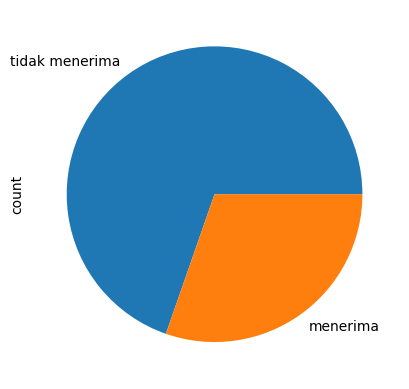

In [90]:
df["BPNT"].value_counts().plot(kind='pie')

**Grafik Pie Chart**
- *Warna biru* menunjukkan jumlah rumah tangga yang tidak menerima bantuan.
- *Warna oranye* menunjukkan jumlah rumah tangga yang menerima bantuan.

*Ukuran area memperlihatkan perbedaan proporsi antara kedua kelompok, dengan kategori "tidak menerima" jauh lebih dominan.*

---

##### **Karakteristik BPNT Berdasarkan Klasifikasi Desa Kota**

<Axes: xlabel='Klasifikasi Desa Kota', ylabel='count'>

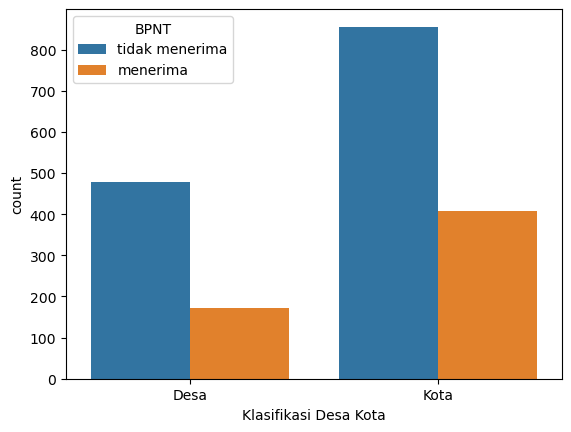

In [91]:
sns.countplot(data=df, x='Klasifikasi Desa Kota', hue="BPNT")

**Interpretasi:**

- Lokasi tempat tinggal (desa atau kota) mempengaruhi peluang suatu keluarga untuk menerima bantuan BPNT.
- Keluarga di daerah kota cenderung lebih banyak menerima bantuan BPNT dibandingkan dengan keluarga di daerah desa.
---

##### **Karakteristik BPNT Berdasarkan Jumlah Balita**

<Axes: xlabel='Jumlah Balita', ylabel='count'>

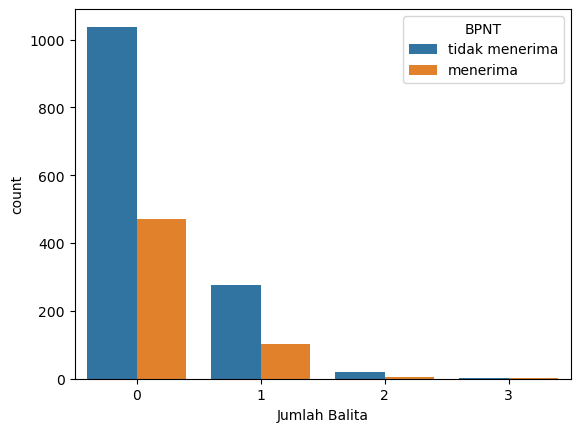

In [92]:
sns.countplot(data=df, x='Jumlah Balita', hue="BPNT")

**Interpretasi:**

- *Keluarga tanpa balita* : Sebagian besar keluarga yang tidak memiliki balita (jumlah balita = 0) tidak menerima bantuan BPNT. 
- *Keluarga dengan 1 balita* : Jumlah keluarga yang memiliki 1 balita dan menerima BPNT juga cukup banyak. 
- *Keluarga dengan 2 atau 3 balita* : Semakin banyak jumlah balita dalam keluarga, semakin sedikit jumlah keluarga yang menerima BPNT.

---

##### **Karakteristik BPNT Berdasarkan Jumlah ART**

<Axes: xlabel='Jumlah ART', ylabel='count'>

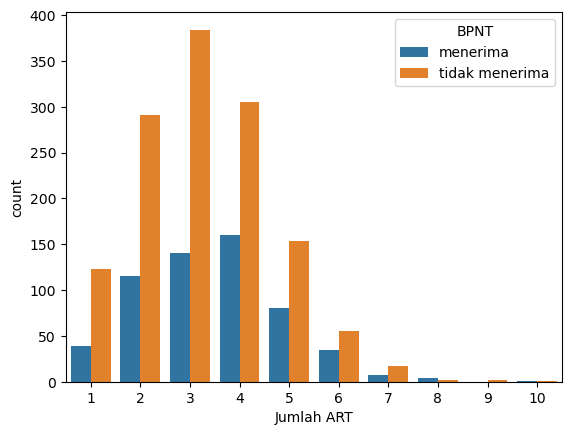

In [93]:
sns.countplot(data=df, x='Jumlah ART', hue="BPNT")

**Interpretasi:**

- *Jumlah ART dan Penerima BPNT* : Grafik menunjukkan bahwa jumlah ART dalam sebuah keluarga memiliki pengaruh terhadap kemungkinan keluarga tersebut menerima bantuan BPNT.
- *Keluarga dengan Jumlah ART Sedang* : Tampaknya, keluarga dengan jumlah ART sekitar 2-4 orang cenderung lebih banyak menerima bantuan BPNT.
- *Keluarga dengan Jumlah ART Banyak atau Sedikit* : Keluarga dengan jumlah ART yang sangat sedikit (1 orang) atau sangat banyak (9-10 orang) cenderung lebih sedikit menerima bantuan BPNT.

---

##### **Karakteristik BPNT Berdasarkan Status Tempat Tinggal**

<Axes: xlabel='Status Tempat Tinggal', ylabel='count'>

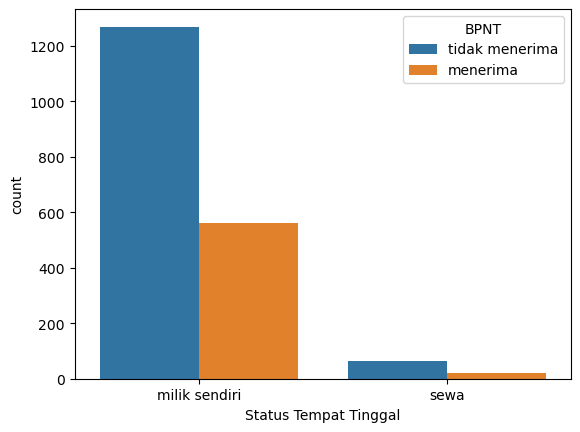

In [94]:
sns.countplot(data=df, x='Status Tempat Tinggal', hue="BPNT")

**Interpretasi:**

-  Status kepemilikan tempat tinggal mempengaruhi peluang suatu keluarga untuk menerima bantuan BPNT.

---

##### **Karakteristik BPNT Berdasarkan Kepemilikan Motor**

<Axes: xlabel='Motor', ylabel='count'>

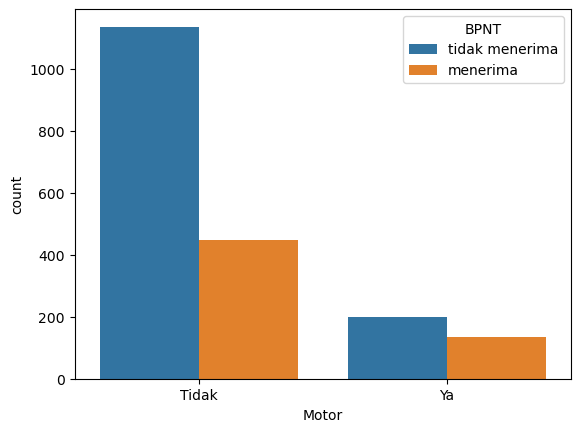

In [95]:
sns.countplot(data=df, x='Motor', hue="BPNT")

**Interpretasi:**

- Keluarga yang tidak memiliki motor cenderung lebih banyak menerima bantuan BPNT dibandingkan dengan keluarga yang memiliki motor.

---

##### **Karakteristik BPNT Berdasarkan Kepemilikan Mobil**

<Axes: xlabel='Mobil', ylabel='count'>

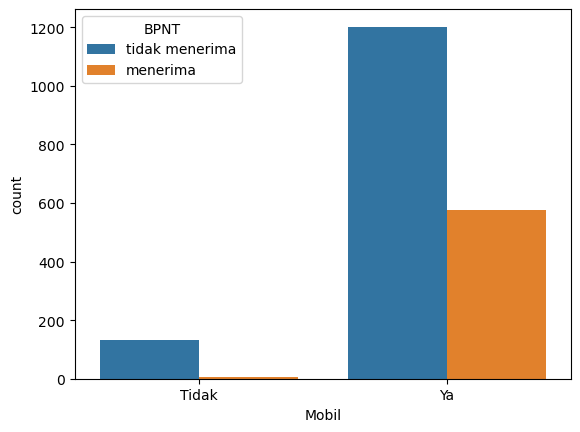

In [96]:
sns.countplot(data=df, x='Mobil', hue="BPNT")

**Interpretasi:**

- Sebagian besar keluarga yang memiliki mobil tidak menerima bantuan BPNT.

---

##### **Karakteristik BPNT Berdasarkan Penghasilan Utama**

<Axes: xlabel='Penghasilan Utama', ylabel='count'>

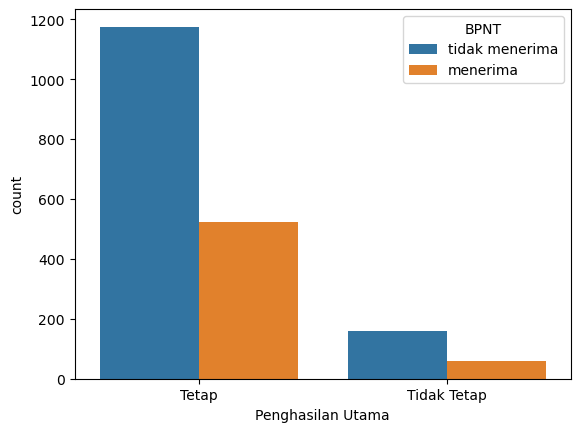

In [97]:
sns.countplot(data=df, x='Penghasilan Utama', hue="BPNT")

**Interpretasi:**

- Keluarga dengan pekerjaan tetap cenderung lebih jarang menerima bantuan BPNT.

---

# Reprossesing Data

In [98]:
# Membaca data dari file Excel
file_path = r"C:\Users\DELL\Downloads\DATA TUGAS REGRESI LOGISTIK.xlsx"

# Load data
df = pd.read_excel(file_path)

df

,BPNT,Klasifikasi Desa Kota,Jumlah Balita,Jumlah ART,Status Tempat Tinggal,Luas Bangunan,Jenis Atap,Jenis Dinding,Sumber Air Minum,Bahan Bakar Masak,Fasilitas KUR,Motor,Mobil,Penghasilan Utama
0,0,1,0,4,1,112,2,1,1,1,2,1,1,1
1,0,1,0,6,1,120,2,1,1,1,2,1,1,1
2,0,1,0,3,1,120,2,1,1,1,1,1,2,1
3,0,1,0,2,1,180,2,1,1,1,2,1,1,2
4,0,1,1,5,1,180,2,2,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,0,2,0,6,1,72,2,1,3,1,2,1,2,1
1911,0,2,0,5,1,54,2,1,3,1,2,1,2,1
1912,0,2,0,1,1,54,2,1,3,3,2,2,2,1
1913,0,2,0,1,1,45,2,3,2,3,2,2,2,2


In [99]:
# Pastikan tidak ada nilai kosong
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
BPNT                     0
Klasifikasi Desa Kota    0
Jumlah Balita            0
Jumlah ART               0
Status Tempat Tinggal    0
Luas Bangunan            0
Jenis Atap               0
Jenis Dinding            0
Sumber Air Minum         0
Bahan Bakar Masak        0
Fasilitas KUR            0
Motor                    0
Mobil                    0
Penghasilan Utama        0
dtype: int64


In [100]:
# Pisahkan variabel prediktor dan respon
X = df[['Klasifikasi Desa Kota', 'Jumlah Balita', 'Jumlah ART', 'Status Tempat Tinggal', 'Luas Bangunan', 'Jenis Atap', 'Jenis Dinding', 'Sumber Air Minum', 'Bahan Bakar Masak', 'Fasilitas KUR', 'Motor', 'Mobil', 'Penghasilan Utama' ]]  # Variabel prediktor
y = df['BPNT']  # Variabel respon

In [101]:
# Tambahkan konstanta untuk model statsmodels
X = sm.add_constant(X)

In [102]:
X

,const,Klasifikasi Desa Kota,Jumlah Balita,Jumlah ART,Status Tempat Tinggal,Luas Bangunan,Jenis Atap,Jenis Dinding,Sumber Air Minum,Bahan Bakar Masak,Fasilitas KUR,Motor,Mobil,Penghasilan Utama
0,1.0,1,0,4,1,112,2,1,1,1,2,1,1,1
1,1.0,1,0,6,1,120,2,1,1,1,2,1,1,1
2,1.0,1,0,3,1,120,2,1,1,1,1,1,2,1
3,1.0,1,0,2,1,180,2,1,1,1,2,1,1,2
4,1.0,1,1,5,1,180,2,2,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,1.0,2,0,6,1,72,2,1,3,1,2,1,2,1
1911,1.0,2,0,5,1,54,2,1,3,1,2,1,2,1
1912,1.0,2,0,1,1,54,2,1,3,3,2,2,2,1
1913,1.0,2,0,1,1,45,2,3,2,3,2,2,2,2


# Split Data

In [103]:
# Pisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pembentukan Model

In [104]:
# Membuat model regresi logistik menggunakan statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.565829
         Iterations 7


Secara keseluruhan, output ini menunjukkan bahwa algoritma regresi logistik telah berhasil menemukan nilai parameter yang optimal untuk model, dan model tersebut memiliki nilai log-likelihood sebesar 0.565829 setelah 7 iterasi.

---

In [105]:
# Menampilkan summary model
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                   BPNT   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1326
Method:                           MLE   Df Model:                           13
Date:                Sun, 22 Dec 2024   Pseudo R-squ.:                 0.08657
Time:                        21:23:09   Log-Likelihood:                -758.21
converged:                       True   LL-Null:                       -830.07
Covariance Type:            nonrobust   LLR p-value:                 3.765e-24
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.1481      1.265     -5.649      0.000      -9.628      -4.668
Klasifikasi Desa Kota     0.0806      0.142      0.568      0.570      -0.197       0.359
Jumlah B

**Interpretasi Koefisien:**

- *Koefisien* : Menunjukkan arah dan kekuatan pengaruh suatu variabel independen terhadap probabilitas menerima BPNT. Koefisien positif berarti peningkatan variabel tersebut cenderung meningkatkan probabilitas menerima BPNT, sedangkan koefisien negatif berarti penurunan probabilitas.
- *P-value* : Menunjukkan tingkat signifikansi statistik dari koefisien. Semakin kecil p-value (biasanya < 0.05), semakin kuat bukti bahwa koefisien tersebut berbeda dari nol, artinya variabel tersebut memiliki pengaruh yang signifikan terhadap variabel dependen.
- *Odds Ratio* : Eksponensial dari koefisien (e^koefisien). Menunjukkan perubahan odds (peluang) menerima BPNT jika variabel independen dinaikkan satu satuan, dengan asumsi variabel lain tetap.


**Contoh Interpretasi:**

- *Jumlah Balita* : Koefisien -0.4814 dan p-value 0.002 menunjukkan bahwa semakin banyak jumlah balita dalam keluarga, semakin kecil kemungkinan keluarga tersebut menerima BPNT.
- *Motor* : Koefisien 0.7440 dan p-value 0.000 menunjukkan bahwa keluarga yang memiliki motor memiliki peluang lebih tinggi untuk menerima BPNT dibandingkan dengan keluarga yang tidak memiliki motor.

---

In [106]:
# Prediksi menggunakan model statsmodels
y_pred = result.predict(X_test) > 0.5
y_prob = result.predict(X_test)

In [107]:
# Membuat DataFrame dari y_pred dan y_prob
prediksi = pd.DataFrame({
    'y_test': y_test,
    'Prediksi': y_pred,
    'Probabilitas': y_prob
})

# Menampilkan DataFrame
print(prediksi)

      y_test  Prediksi  Probabilitas
1232       0     False      0.228094
111        0     False      0.293567
316        0     False      0.217051
781        0     False      0.360694
416        0     False      0.064553
...      ...       ...           ...
1829       0     False      0.275427
493        0     False      0.343569
1402       0     False      0.386429
277        0     False      0.031451
1768       0     False      0.307248

[575 rows x 3 columns]


**Interpretasi:**

Dari tabel tersebut, kita dapat melihat bahwa model umumnya memprediksi bahwa sebagian besar individu dalam data pengujian tidak akan menerima bantuan BPNT. Ini terlihat dari banyaknya prediksi "False" pada kolom Prediksi.


**Contoh Interpretasi Baris Pertama:**

- *y_test = 0* : Individu dengan indeks 1232 dalam data pengujian sebenarnya tidak menerima bantuan BPNT (nilai sebenarnya).
- *Prediksi = False* : Model memprediksi bahwa individu ini juga tidak akan menerima bantuan BPNT.
- *Probabilitas = 0.228094* : Model memiliki tingkat kepercayaan sekitar 22.8% bahwa prediksi "False" ini benar.

---

# Ukuran Kebaikan Model

In [108]:
# Ukuran kebaikan model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7373913043478261
Confusion Matrix:
 [[389  21]
 [130  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       410
           1       0.62      0.21      0.32       165

    accuracy                           0.74       575
   macro avg       0.69      0.58      0.58       575
weighted avg       0.71      0.74      0.69       575



**Akurasi (Accuracy): 0.7373913043478261**

*Artinya*, model berhasil memprediksi dengan benar sekitar 73,74% dari seluruh data pengujian. Ini berarti, dari semua prediksi yang dibuat, sekitar 73,74% prediksi tersebut sesuai dengan kenyataan di lapangan.
Confusion Matrix


**[[389 21] [130 35]]**
Matriks ini memberikan gambaran lebih detail tentang seberapa baik model Anda dalam mengklasifikasikan data.
- *389* : Jumlah data yang sebenarnya tidak menerima BPNT dan berhasil diprediksi sebagai tidak menerima BPNT (True Negative).
- *21* : Jumlah data yang sebenarnya tidak menerima BPNT tetapi salah diprediksi sebagai menerima BPNT (False Positive).
- *130* : Jumlah data yang sebenarnya menerima BPNT tetapi salah diprediksi sebagai tidak menerima BPNT (False Negative).
- *35* : Jumlah data yang sebenarnya menerima BPNT dan berhasil diprediksi sebagai menerima BPNT (True Positive).

**Classification Report**

- *Precision* : Mengukur seberapa akurat prediksi positif (menerima BPNT). Nilai precision yang tinggi menunjukkan bahwa ketika model memprediksi seseorang akan menerima BPNT, prediksi tersebut cenderung benar.
- *Recall* : Mengukur seberapa banyak dari data positif (yang sebenarnya menerima BPNT) yang berhasil diidentifikasi oleh model. Nilai recall yang tinggi menunjukkan bahwa model mampu menemukan sebagian besar kasus positif.
- *F1-score* : Merupakan nilai rata-rata harmonik antara precision dan recall, memberikan gambaran keseluruhan tentang kinerja model.


**Interpretasi Keseluruhan:**

Berdasarkan hasil evaluasi, model ini cukup baik dalam memprediksi individu yang tidak berhak menerima BPNT (kelas 0). Namun, model masih kesulitan dalam mengidentifikasi individu yang berhak menerima BPNT (kelas 1). Hal ini terlihat dari nilai recall yang rendah untuk kelas 1.


---

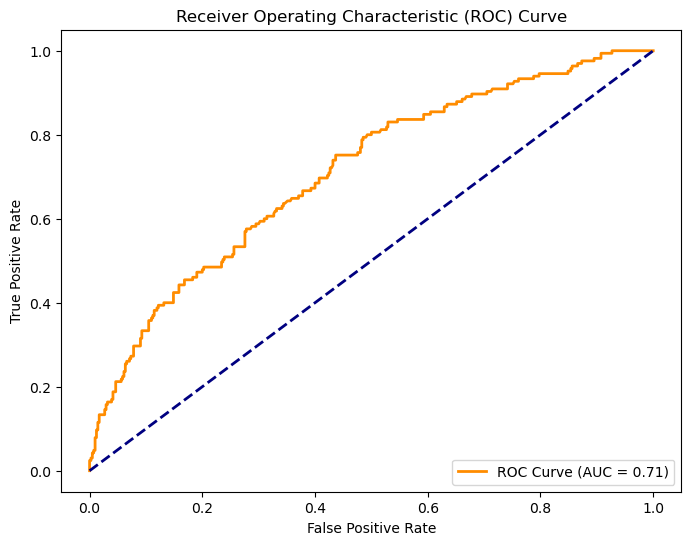

AUC: 0.71


In [109]:
# Kurva ROC dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Menampilkan nilai AUC
print(f"AUC: {roc_auc:.2f}")

**Kurva ROC adalah visualisasi yang digunakan untuk mengukur kinerja model klasifikasi biner. Grafik ini menggambarkan hubungan antara true positive rate (TPR) dan false positive rate (FPR) pada berbagai ambang batas klasifikasi.**

**Komponen Utama Kurva ROC:**
- *True Positive Rate (TPR) atau Sensitivity* : Proporsi instance positif yang benar-benar diklasifikasikan sebagai positif. Semakin tinggi TPR, semakin baik model dalam mengidentifikasi kasus positif.
- *False Positive Rate (FPR)* : Proporsi instance negatif yang salah diklasifikasikan sebagai positif. Semakin rendah FPR, semakin sedikit kesalahan dalam mengklasifikasikan kasus negatif sebagai positif.
- *Area Under the Curve (AUC)* : Luas di bawah kurva ROC. Nilai AUC berkisar antara 0 hingga 1. Semakin tinggi nilai AUC, semakin baik kinerja model. Nilai AUC 0.5 menunjukkan model tidak lebih baik dari sekadar menebak secara acak.


**Interpretasi Grafik ROC:**
- *Garis Diagonal* : Garis diagonal pada grafik mewakili kinerja model yang benar-benar acak. Jika model berada di sekitar garis diagonal, artinya kinerja model tidak jauh berbeda dari menebak secara acak.
- *Kurva Model* : Kurva oranye pada grafik mewakili kinerja model. Semakin jauh kurva dari garis diagonal dan semakin dekat ke sudut kiri atas, semakin baik kinerja model tersebut.
- *AUC = 0.71* : Nilai AUC 0.71 menunjukkan bahwa model ini memiliki kinerja yang cukup baik, tetapi masih ada ruang untuk perbaikan.

---

# Odds Ratio

In [110]:
# Mendapatkan Odds Ratio
odds_ratios = np.exp(result.params)  # Menghitung nilai Odds Ratio

# Menampilkan Koefisien dan Odds Ratio
odds_ratios_df = pd.DataFrame({
    'Variable': result.params.index,  # Nama variabel
    'Coefficient (β)': result.params.values,  # Koefisien logistik
    'Odds Ratio': odds_ratios.values  # Odds Ratio
})

print(odds_ratios_df)

                 Variable  Coefficient (β)  Odds Ratio
0                   const        -7.148104    0.000786
1   Klasifikasi Desa Kota         0.080575    1.083911
2           Jumlah Balita        -0.481359    0.617943
3              Jumlah ART         0.332464    1.394400
4   Status Tempat Tinggal        -0.213551    0.807711
5           Luas Bangunan        -0.003641    0.996366
6              Jenis Atap        -0.155260    0.856193
7           Jenis Dinding         0.450190    1.568610
8        Sumber Air Minum         0.089695    1.093840
9       Bahan Bakar Masak         0.137797    1.147742
10          Fasilitas KUR        -0.044005    0.956949
11                  Motor         0.744039    2.104418
12                  Mobil         2.291270    9.887482
13      Penghasilan Utama        -0.212983    0.808170




**Interpretasi Odds Ratio:**

- *Odds Ratio > 1* : Artinya, jika nilai variabel independen naik satu satuan, maka odds (peluang) seseorang menerima BPNT akan meningkat. Semakin besar nilai odds ratio, semakin kuat pengaruh variabel tersebut terhadap peningkatan peluang menerima BPNT.
- *Odds Ratio < 1* : Artinya, jika nilai variabel independen naik satu satuan, maka odds (peluang) seseorang menerima BPNT akan menurun. Semakin kecil nilai odds ratio, semakin kuat pengaruh variabel tersebut terhadap penurunan peluang menerima BPNT.
- *Odds Ratio = 1* : Artinya, perubahan nilai variabel independen tidak berpengaruh terhadap odds (peluang) seseorang menerima BPNT.

**Contoh Interpretasi:**

- *Jumlah Balita* : Odds ratio 0.617943 < 1. Artinya, semakin banyak jumlah balita dalam keluarga, semakin kecil kemungkinan keluarga tersebut menerima BPNT.
- *Motor* : Odds ratio 2.104418 > 1. Artinya, keluarga yang memiliki motor memiliki peluang lebih tinggi untuk menerima BPNT dibandingkan dengan keluarga yang tidak memiliki motor.
- *Mobil* : Odds ratio 9.887482 >> 1. Artinya, keluarga yang memiliki mobil memiliki peluang jauh lebih tinggi untuk menerima BPNT dibandingkan dengan keluarga yang tidak memiliki mobil.

---

# Asumsi

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Fungsi untuk menghitung VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Menghitung VIF untuk variabel di training set
vif_result = calculate_vif(X_train)
print(vif_result)


                 Variable         VIF
0                   const  190.430602
1   Klasifikasi Desa Kota    1.136640
2           Jumlah Balita    1.310427
3              Jumlah ART    1.543778
4   Status Tempat Tinggal    1.041832
5           Luas Bangunan    1.177738
6              Jenis Atap    1.095155
7           Jenis Dinding    1.145610
8        Sumber Air Minum    1.158024
9       Bahan Bakar Masak    1.101906
10          Fasilitas KUR    1.041918
11                  Motor    1.321557
12                  Mobil    1.076396
13      Penghasilan Utama    1.162032


**Interpretasi Tabel VIF:**

- *Nilai VIF* : Semakin tinggi nilai VIF, semakin besar tingkat multikolinearitas antara variabel tersebut dengan variabel independen lainnya.
- *Ambang Batas* : Umumnya, nilai VIF di atas 10 dianggap menunjukkan adanya masalah multikolinearitas yang serius. Namun, beberapa sumber menggunakan ambang batas yang berbeda, seperti 5 atau 7.

**Interpretasi Model:**

- *Tidak ada masalah multikolinearitas yang signifikan* : Sebagian besar variabel memiliki nilai VIF yang jauh di bawah 10. Ini mengindikasikan bahwa tidak ada korelasi yang sangat tinggi antara variabel-variabel tersebut.
- *Potensi masalah kecil* : Beberapa variabel seperti "Jumlah Balita", "Jumlah ART", dan "Motor" memiliki nilai VIF yang sedikit di atas 1. Meskipun tidak terlalu mengkhawatirkan, 
---